In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [21]:
wine_dir = '/home/atharva/Projects/WIne/'
red_wine = pd.read_csv(wine_dir + 'winequality_red.csv')

In [22]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There are no missing values in the Dataset.

In [73]:
red_wine.shape

(1599, 12)

In [32]:
#Every Column except 'quality' is a feature

features = red_wine.drop('quality', axis = 1)

In [12]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


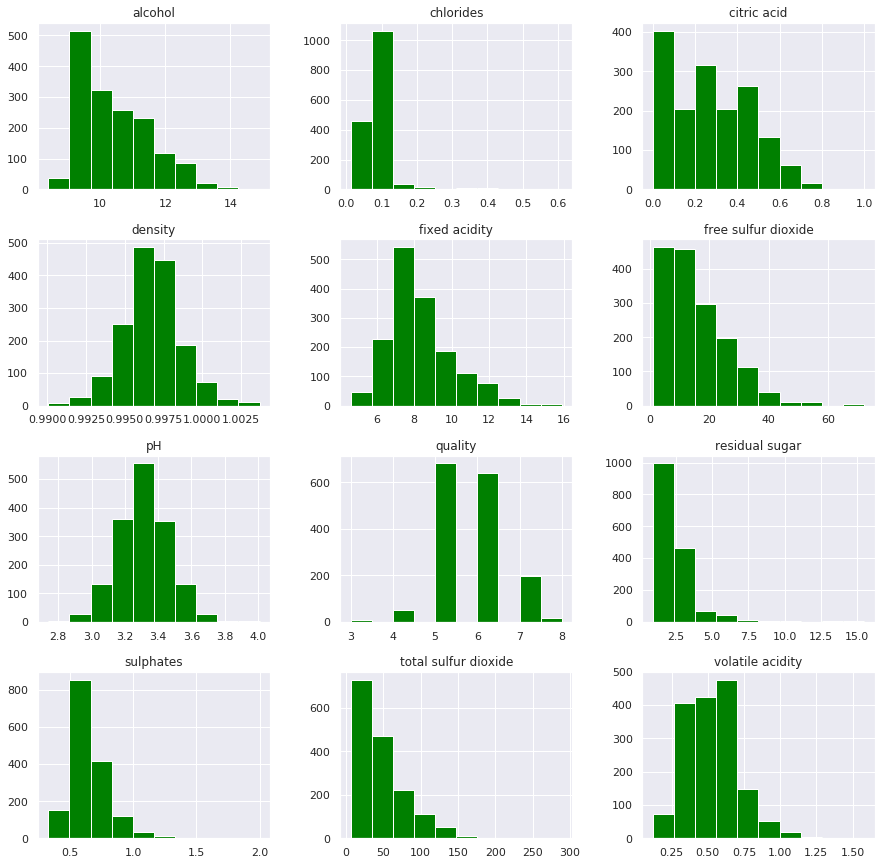

In [13]:
red_wine.hist(figsize = (15,15) ,color = 'green')
plt.show()

As always, histograms provide a lot of statistical insight. We can see most wines are in the quality range of 5-6. Keeping in mind that these scores were provided by humans, we can deduce that almost all wines are similar in quality, and very few wines stand out as 'extremely good' or 'extremely bad'.

Moreover, there are almost negligible number of wines less than a rating of '5'. This will come in handy when we distinguish wines as 'good' and 'bad' based on quality rating.

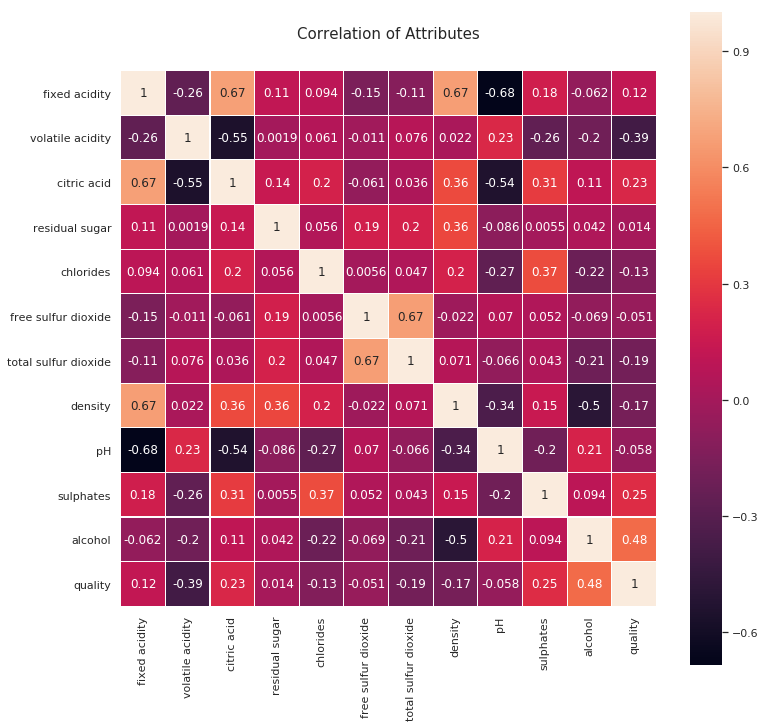

In [14]:
plt.figure(figsize=(12,12))
plt.title('Correlation of Attributes', y=1.05, size=15)
sns.heatmap(red_wine.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, 
            linecolor='white', annot=True)

In [74]:
good_wine = (red_wine['quality'] > 5).astype(int)
good_wine.head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64

I used > 5 as the criteria for wine just to have a balance between count of 'good' and 'bad' wines.

Suppose if I had taken red_wine['quality'] > 6 as the criteria(which is also a fair choice), the dataset would have been dominated with bad wines, which would in turn bias any ML model.

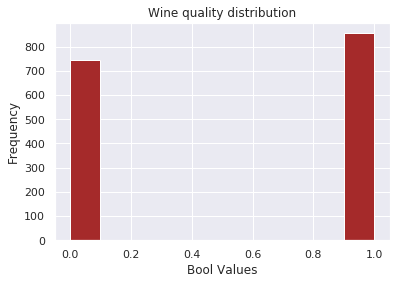

In [75]:
plot = good_wine.plot.hist(color = 'brown')
plot.set_title('Wine quality distribution',fontsize = 12)
plot.set_xlabel('Bool Values')

This Distribution is Fair enough to fit our ML models on.

# Implementing some approporiate ML models:

## 1: Random Forest Classifier:

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix

In [37]:
seed = 7
X_train, X_test, y_train, y_test = train_test_split(features,good_wine, test_size = 0.1, random_state = seed)

In [38]:
X_train.shape

(1439, 11)

In [39]:
X_test.shape

(160, 11)

In [40]:
Random_classifier = RandomForestClassifier(random_state = seed)
Random_classifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

In [50]:
cross_val_scores = cross_val_score(Random_classifier,X_train,y_train,cv =15, scoring = 'accuracy')
cross_val_scores

array([0.8556701 , 0.80412371, 0.83505155, 0.77319588, 0.79166667,
       0.78125   , 0.77083333, 0.80208333, 0.83333333, 0.75      ,
       0.84210526, 0.81052632, 0.83157895, 0.85263158, 0.76842105])

In [61]:
Random_classifier.fit(X_train, y_train)
RF_predictions = Random_classifier.predict(X_test)

In [62]:
for x in range(10):
    print('Predicted quality:',y_test.iloc[x],', Actual quality:',RF_predictions[x])

('Predicted quality:', 1, ', Actual quality:', 0)
('Predicted quality:', 1, ', Actual quality:', 1)
('Predicted quality:', 1, ', Actual quality:', 1)
('Predicted quality:', 0, ', Actual quality:', 0)
('Predicted quality:', 1, ', Actual quality:', 0)
('Predicted quality:', 1, ', Actual quality:', 1)
('Predicted quality:', 1, ', Actual quality:', 1)
('Predicted quality:', 1, ', Actual quality:', 1)
('Predicted quality:', 1, ', Actual quality:', 1)
('Predicted quality:', 0, ', Actual quality:', 0)


In [64]:
accuracy_score(y_test,RF_predictions)

0.79375

### Accuracy ~80%.
This is not one the best accuracy scores, but considering that I used the default h-parameters, it is a fairly good starting score.

In [76]:
log_loss(y_test,RF_predictions)

7.123662611321839

In [77]:
confusion_matrix(y_test,RF_predictions)

array([[51,  8],
       [25, 76]])

The confusion matrix further provides us with insight. There are more false Negatives than false Positives, which implies that the model tends to predict the value '1' more than '0' , which is not surprising given that our dataset has more bias towards quality '1'.

## 2: Logistic Regression:

In [67]:
from sklearn.linear_model import LogisticRegression

In [57]:
Logit = LogisticRegression(random_state = seed)
Logit

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=7, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [58]:
cross_val_scores = cross_val_score(Logit,X_train,y_train,cv=15,scoring = 'accuracy')
cross_val_scores

/home/atharva/.local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.74226804, 0.73195876, 0.78350515, 0.73195876, 0.72916667,
       0.77083333, 0.73958333, 0.76041667, 0.77083333, 0.61458333,
       0.82105263, 0.74736842, 0.75789474, 0.73684211, 0.78947368])

In [59]:
cross_val_scores.mean()

0.7485159311509012

In [69]:
Logit.fit(X_train,y_train)
LR_predictions = Logit.predict(X_test)

In [70]:
for x in range(10):
    print('Predicted quality:',y_test.iloc[x],', Actual quality:',LR_predictions[x])

('Predicted quality:', 1, ', Actual quality:', 0)
('Predicted quality:', 1, ', Actual quality:', 1)
('Predicted quality:', 1, ', Actual quality:', 1)
('Predicted quality:', 0, ', Actual quality:', 0)
('Predicted quality:', 1, ', Actual quality:', 1)
('Predicted quality:', 1, ', Actual quality:', 1)
('Predicted quality:', 1, ', Actual quality:', 1)
('Predicted quality:', 1, ', Actual quality:', 1)
('Predicted quality:', 1, ', Actual quality:', 0)
('Predicted quality:', 0, ', Actual quality:', 1)


In [71]:
accuracy_score(y_test,LR_predictions)

0.725

### Accuracy ~72%
This is lesser than what we achieved with the random forest model.

In [78]:
confusion_matrix(y_test,LR_predictions)

array([[42, 17],
       [27, 74]])